### NOTE: Detailed methodology followed in this analysis is described in this [report](https://github.com/anirudhk686/weather_data_analysis/blob/master/Final_report.pdf)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.patches as mp
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.tseries.offsets import *
import datetime 
import os
%matplotlib inline

df_1=pd.read_csv(os.getcwd()+'/data/iig_maitri2012-15.csv')
#the analysis is done on maitri data however other files in data folder also can be specified in above path of csv
df_1.iloc[:,0]
index=pd.to_datetime(df_1.iloc[:,0])
df = pd.DataFrame(data=df_1.values[:,1:],index=index,columns=['t','rh','ws','wd','ap'])
idx = pd.date_range('2012-01-01 00:00:00','2015-12-31 23:00:00',freq='H')
df=df.reindex(idx,fill_value=None)
for col in df:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.interpolate()

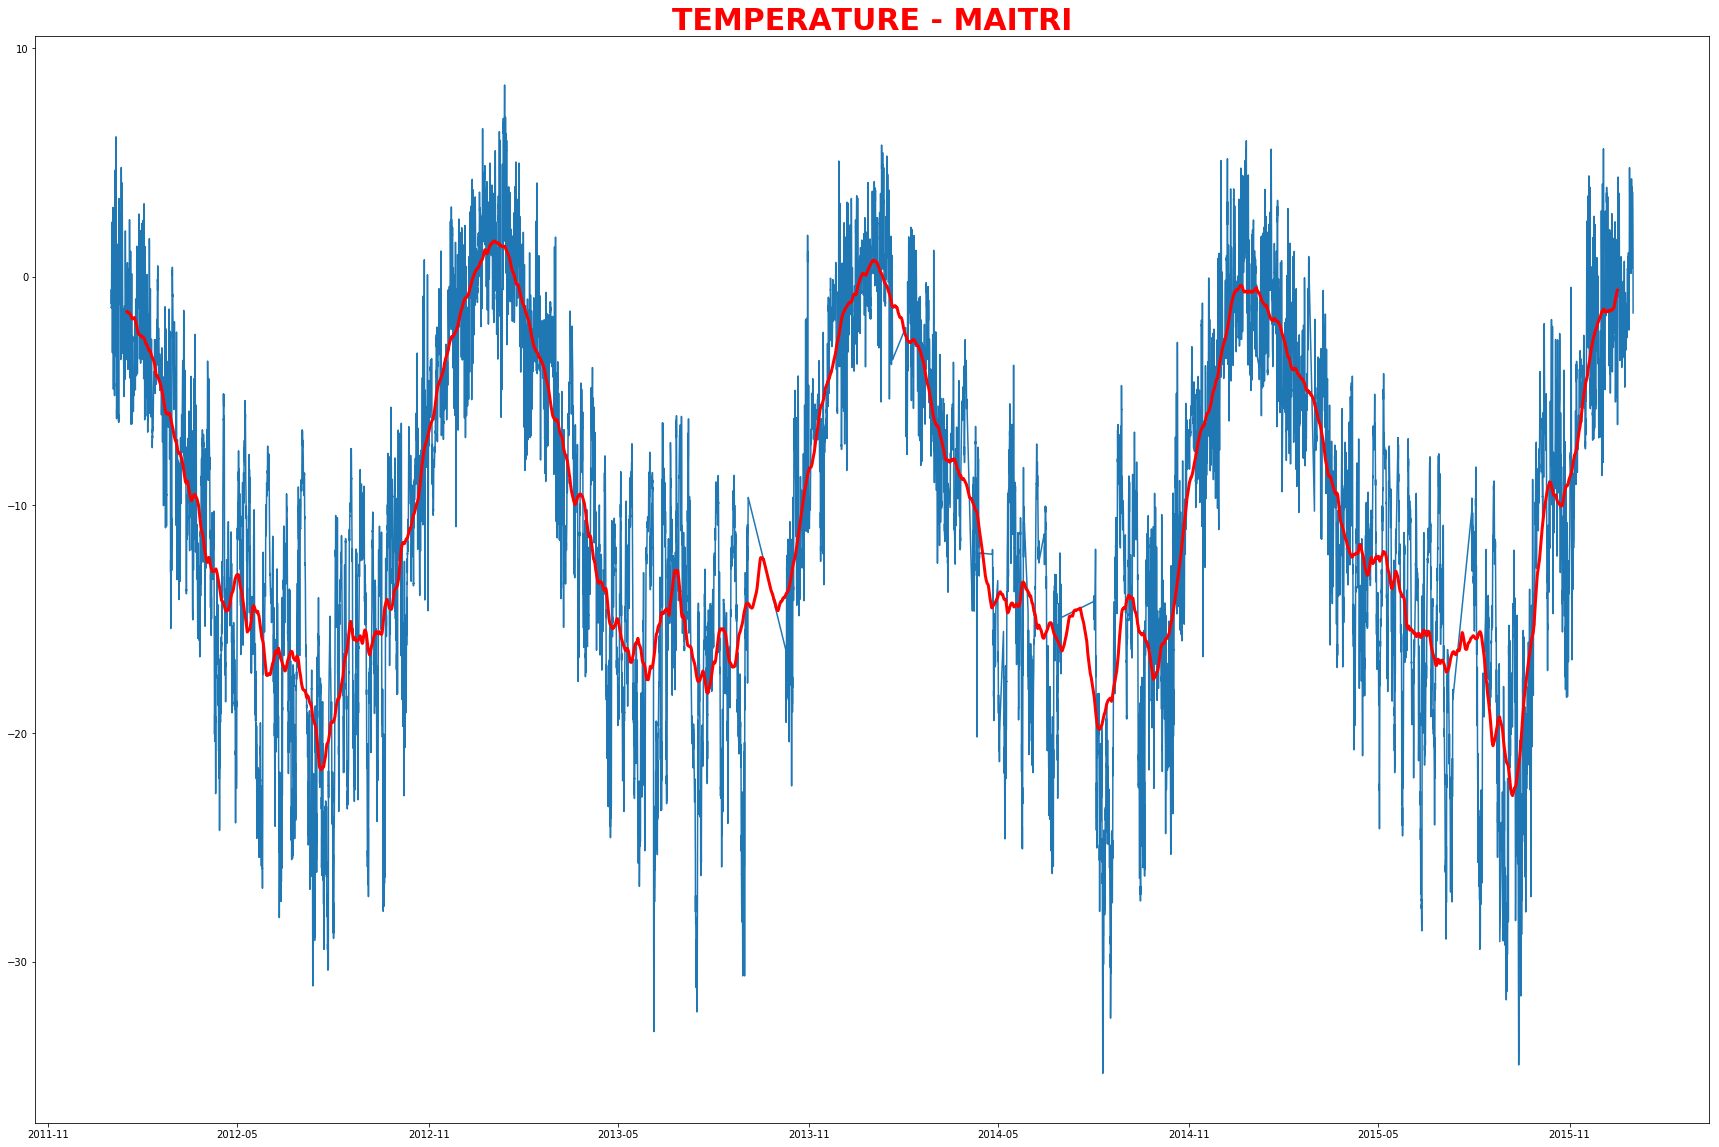

In [3]:
x=pd.DataFrame(data=df['t'],index=df.index)['2012-01':'2015-12']
plt.figure(figsize=(30,20))
plt.plot(x.index,x.iloc[:,0])

z=x.iloc[:,0].rolling(720,center=True).mean()
plt.plot(x.index,z,color = 'r',linewidth=3)
plt.title('TEMPERATURE - MAITRI',fontdict = {'fontweight': 'bold', 'color': 'red','size':30} )

plt.show()

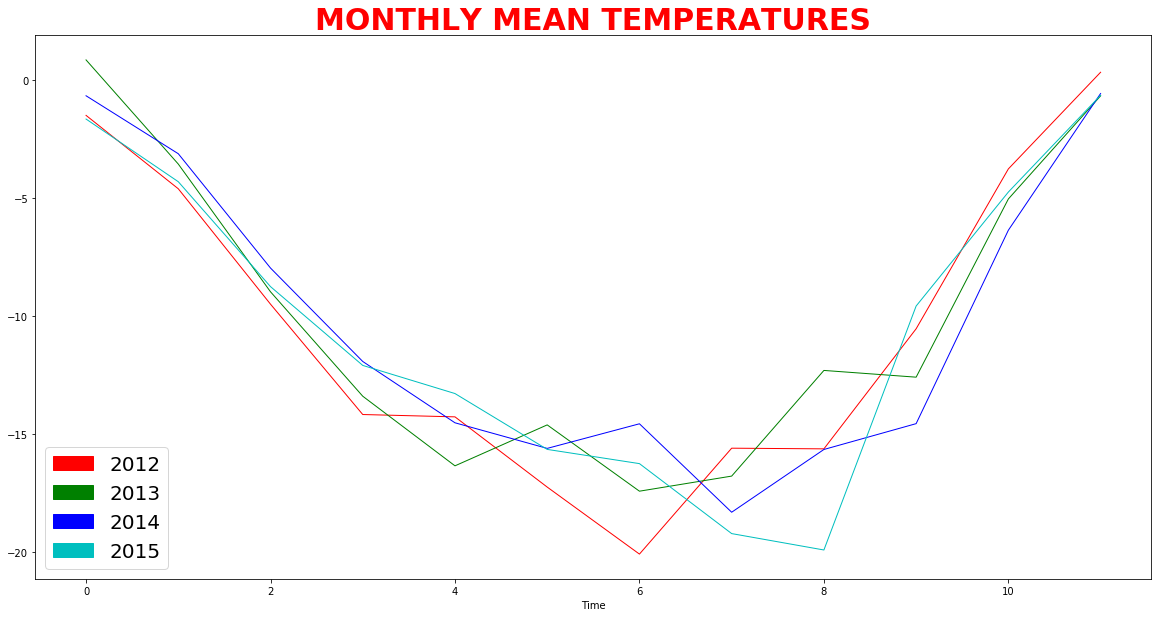

In [4]:
#MONTHLY MEAN ALL FOUR YEARS
x=pd.Series(data=df['t'],index=df.index)

#removing leap year effect in 2012
x1 = x['2012-01':'2012-02-28 23:00:00']
x2 = x['2012-03':'2015-12']
x = x1.append(x2,ignore_index=False)

y=pd.DataFrame({'mean':x.groupby([pd.TimeGrouper('A'),pd.TimeGrouper('M')]).mean()}).reset_index()
grp =y.groupby('level_0')


z=pd.DataFrame()
for a,b in grp:
    z[a.year]=b.iloc[:,2].values


plt.figure(figsize=(20,10))
plt.title('MONTHLY MEAN TEMPERATURES',fontdict = {'fontweight': 'bold', 'color': 'red','size':30})
plt.plot(z.index,z.iloc[:,0],color = 'r',linewidth=1)
plt.plot(z.index,z.iloc[:,1],color = 'g',linewidth=1)
plt.plot(z.index,z.iloc[:,2],color = 'b',linewidth=1)
plt.plot(z.index,z.iloc[:,3],color ='c',linewidth=1)
ax = plt.gca()
ax.set_xlabel("Time")
ax.legend(handles = [mp.Patch(color='r',label="2012"),
    mp.Patch(color='g',label="2013"), mp.Patch(color='b',label="2014"), mp.Patch(color='c',label="2015")]
    , prop = {'size': 20})
plt.show()
    

 WINTER : MAY - AUGUST
SUMMER : DEC - FEB

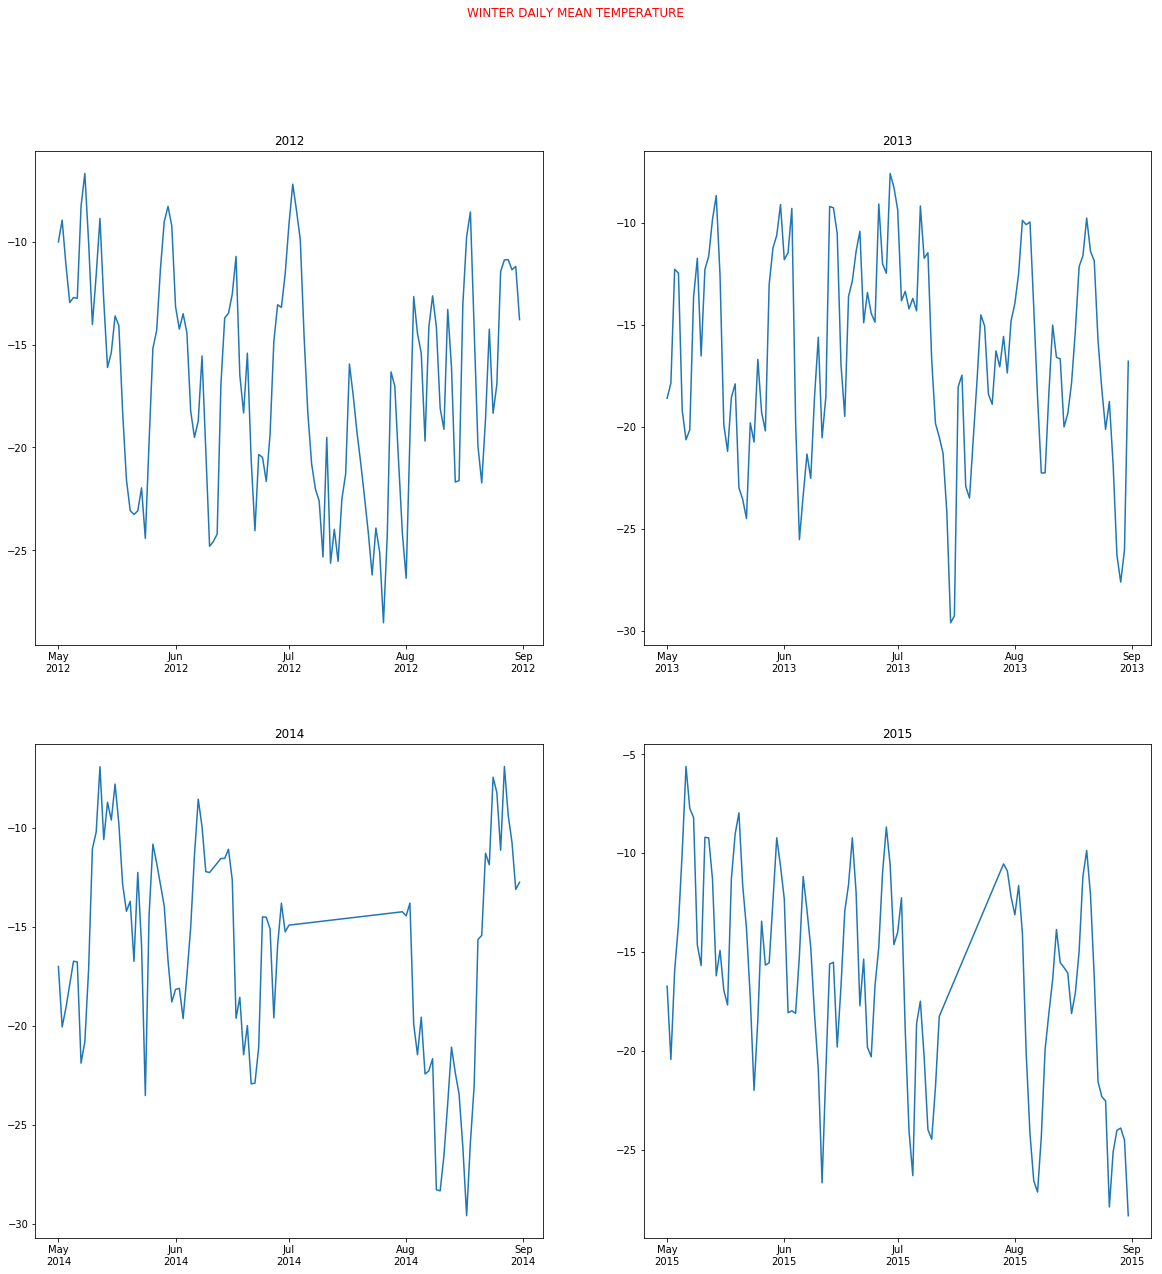

In [5]:
x=pd.Series(data=df['t'],index=df.index)
'''
#removing leap year effect from 2012
x1 = x['2012-01':'2012-02-28 23:00:00']
x2 = x['2012-03':'2015-12']
x = x1.append(x2,ignore_index=False)
'''

plt.figure(figsize=(20,20))

plt.suptitle('WINTER DAILY MEAN TEMPERATURE',fontdict = {'fontweight': 'bold', 'color': 'red','fontsize':100})
start = pd.to_datetime('2012-05-01')
c=221
for i in range(4):
    end=start+DateOffset(months=4,hours=-1)
    t=x[start:end]
    grp = t.groupby(pd.TimeGrouper('D'))
    y=pd.DataFrame({'mean':grp.mean()})
    plt.subplot(c+i)
    plt.plot(y)
    plt.title(str(start.year))
    start = start+DateOffset(years=1)
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b\n%Y"))

plt.show()

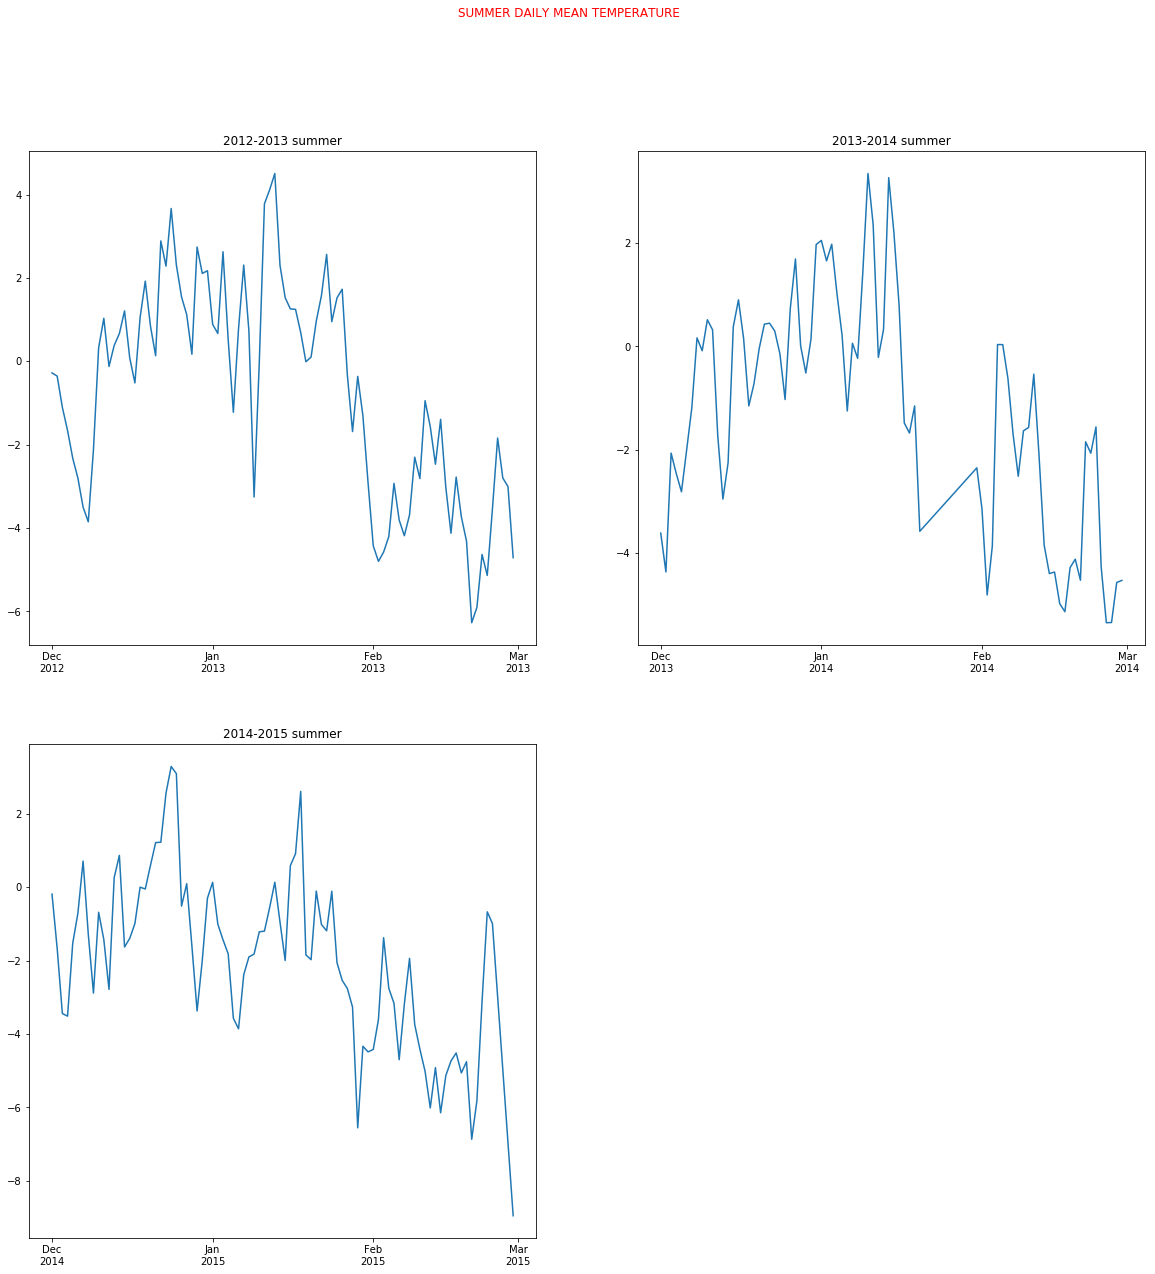

In [6]:
x=pd.Series(data=df['t'],index=df.index)
'''
#removing leap year effect from 2012
x1 = x['2012-01':'2012-02-28 23:00:00']
x2 = x['2012-03':'2015-12']
x = x1.append(x2,ignore_index=False)
'''

plt.figure(figsize=(20,20))
plt.suptitle('SUMMER DAILY MEAN TEMPERATURE',fontdict = {'fontweight': 'bold', 'color': 'red','fontsize':100})

start = pd.to_datetime('2012-12-01')
c=221
for i in range(3):
    end=start+DateOffset(months=3,hours=-1)
    t=x[start:end]
    grp = t.groupby(pd.TimeGrouper('D'))
    y=pd.DataFrame({'mean':grp.mean()})
    plt.subplot(c+i)
    plt.plot(y)
    plt.title(str(start.year)+'-'+str(end.year)+' summer')
    start = start+DateOffset(years=1)
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b\n%Y"))
plt.show()